# Notebook to perform Preprocessing 

**Developed by** : Srivalli Kolla

**Würzburg Institute for Systems Immunology - JMU-Würzburg**

**Created on** : April 09, 2024

**Modified on** : April 09,2024

# Importing packages

In [1]:
import anndata as ad
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up environment

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=300, facecolor="white")

/Users/srivalli/conda/envs/scanpy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.4 scipy==1.12.0 pandas==2.2.1 scikit-learn==1.4.1.post1 statsmodels==0.14.1 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


# Importing data

In [3]:
vascular = ad.read_h5ad('../Data/hca_heart_vascular_raw.h5ad')
vascular

AnnData object with n_obs × n_vars = 195395 × 33538
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

# Quality check

## Number of genes

### Number of genes vs Region

/var/folders/m6/j4jl72rj0pl7_bbwngtxl9ym0000gn/T/ipykernel_5617/938521330.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = vascular.obs.groupby('region')['n_genes'].median().values


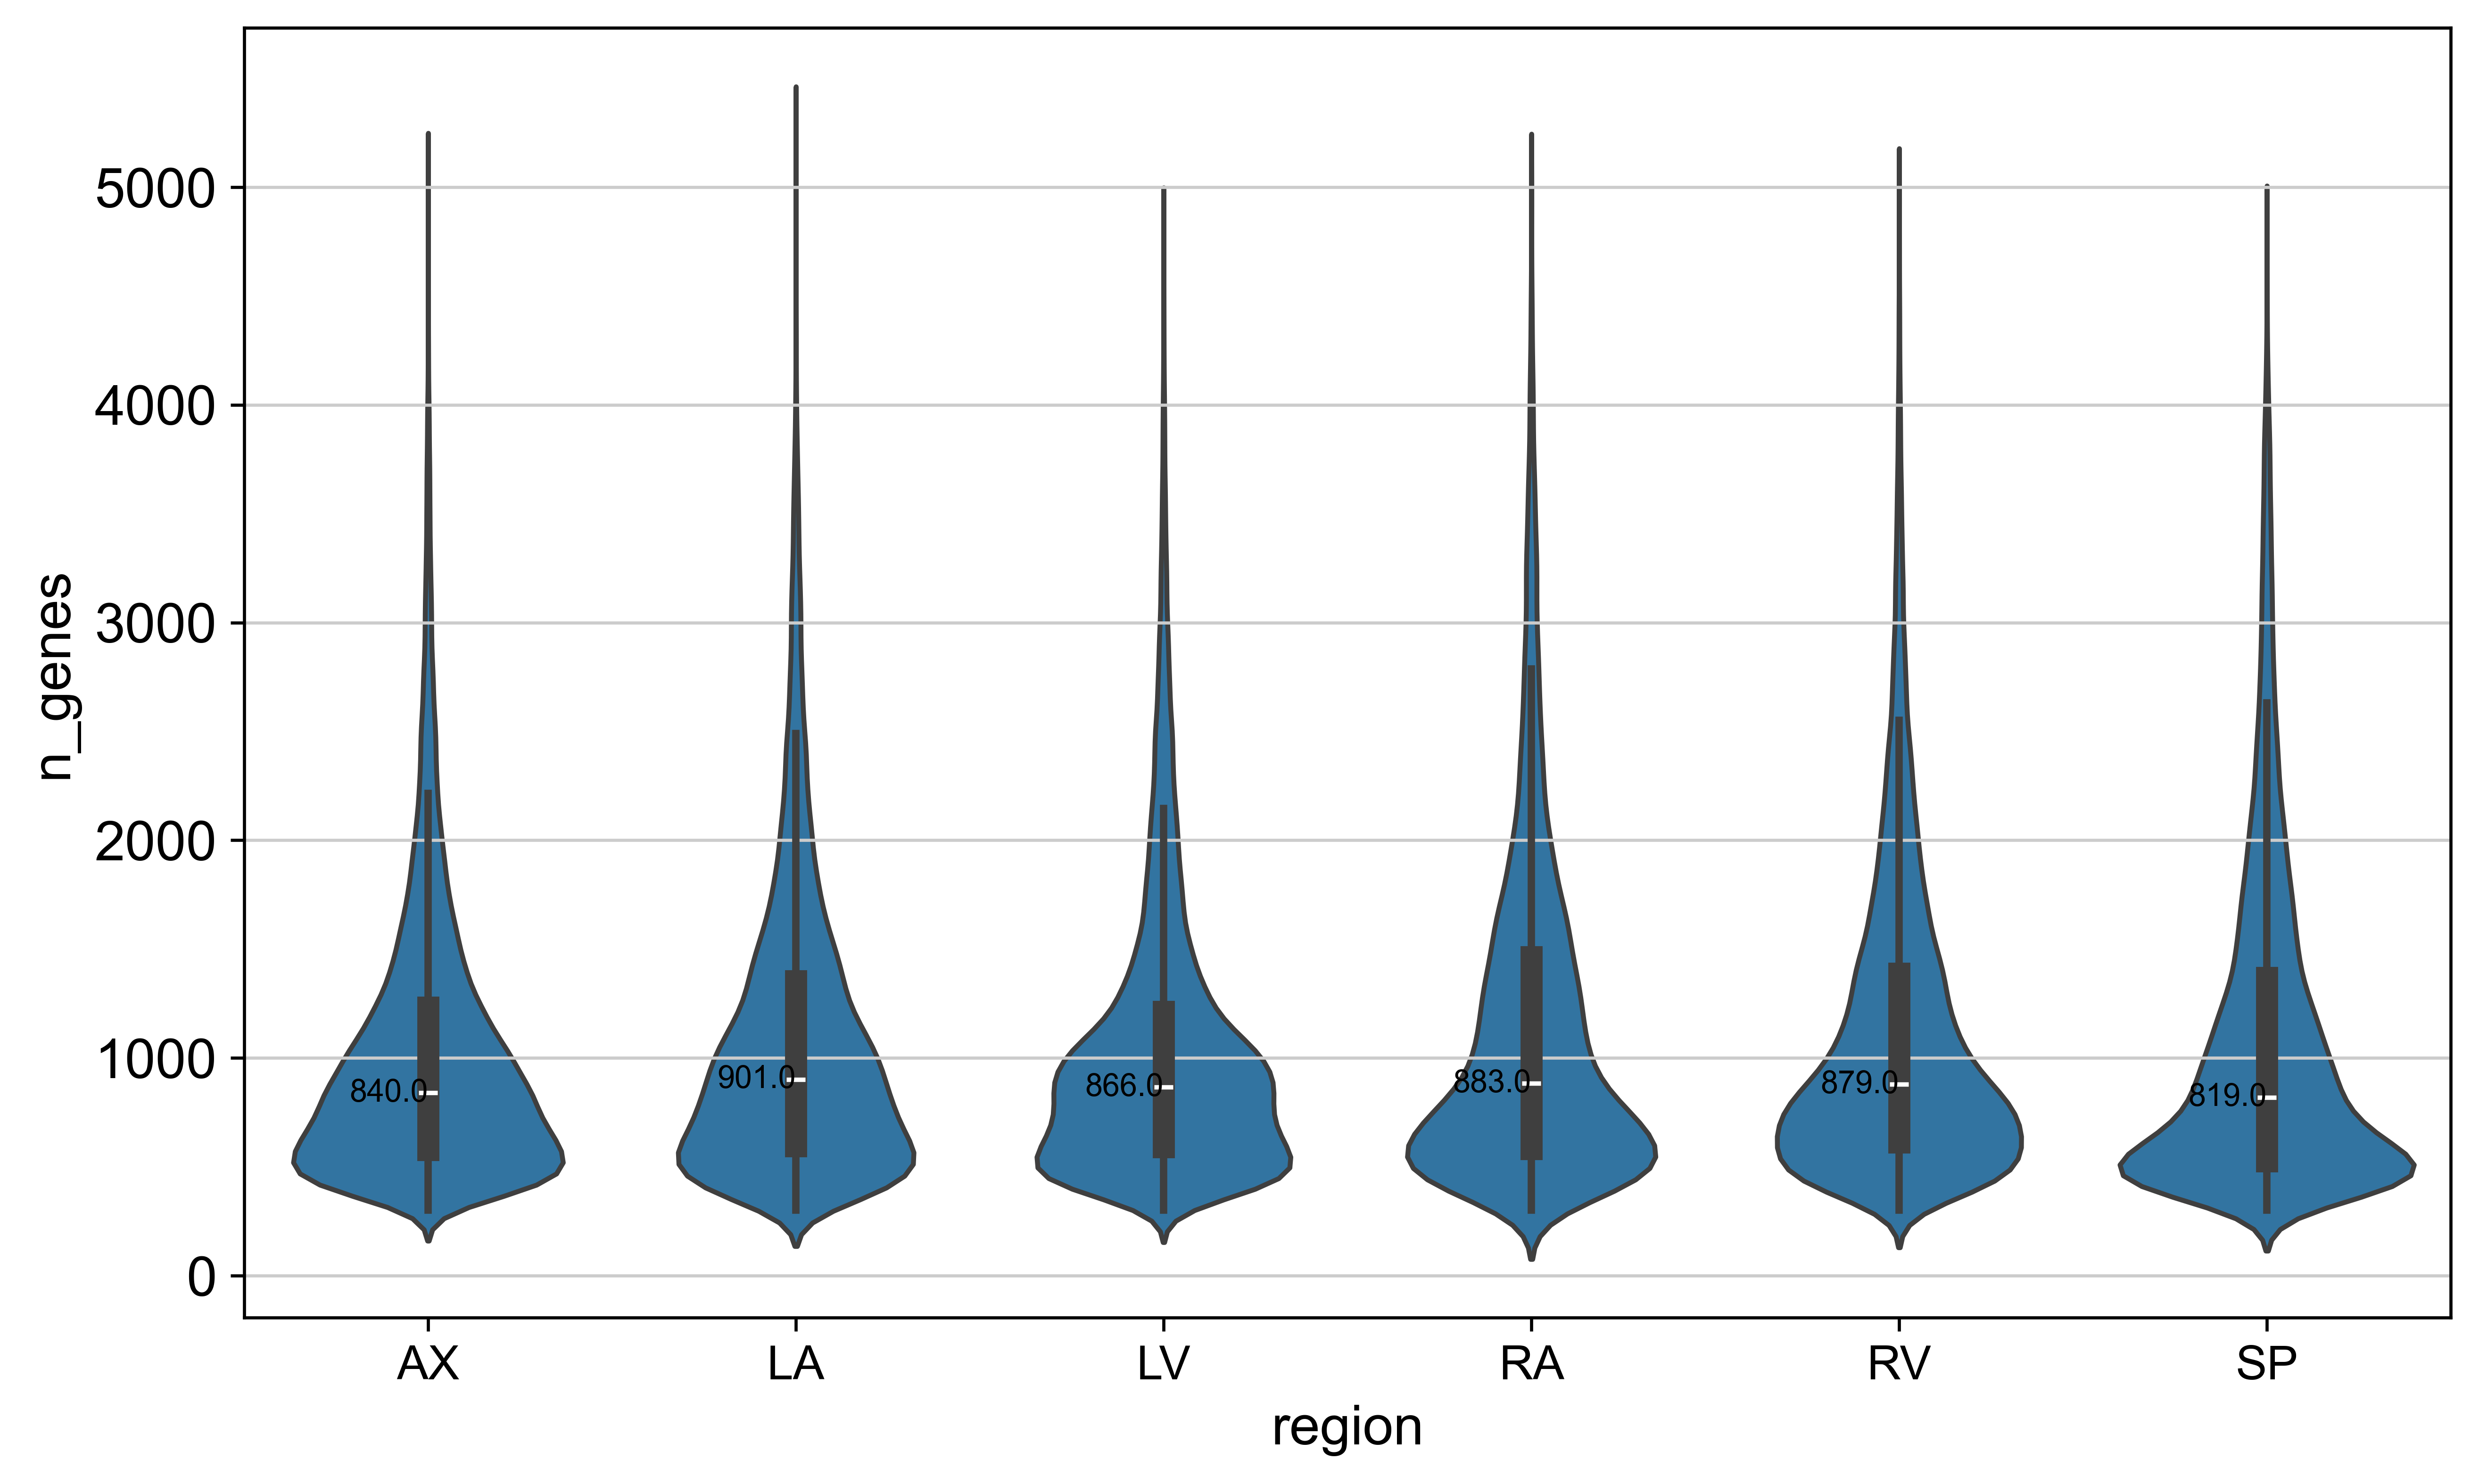

In [4]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='region', y='n_genes', data=vascular.obs)

# Calculate median values for each group
medians = vascular.obs.groupby('region')['n_genes'].median().values

# Add median values to the plot
for i, median in enumerate(medians):
    plt.text(i, median, f'{median}',fontsize=8, horizontalalignment='right', verticalalignment='center', color = 'black')

# Set font size for specific text elements
plt.xticks(fontsize=12)
plt.show()

##### *Description of data analysed*

The violin plot clearly demonstrates us that similar range of genes are observed in all the regions. Though there are variations in median values, the range and representation is similar. 

LV represents more number of genes above 1000 compared to others according to the width of plot.

All regions have more number of genes in the range of 100-1000

##### *Description of violin plots*

**Violin Body**: The central part of the violin plot represents the probability density of the data.

**Box Plot**:
        Median (White line inside the box) Q2 ;
        Quartiles (the edges of the box) Q1,Q3 - Height of box represent Interquartile region (Q1-Q2-Q3) ;
        Outliers (points beyond the whiskers)

**Whiskers**: The whiskers extend from the box to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles

**Outliers**: Individual data points beyond the whiskers

### Number of genes vs Cell source

/var/folders/m6/j4jl72rj0pl7_bbwngtxl9ym0000gn/T/ipykernel_5617/567844369.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = vascular.obs.groupby('cell_type')['n_genes'].median().values


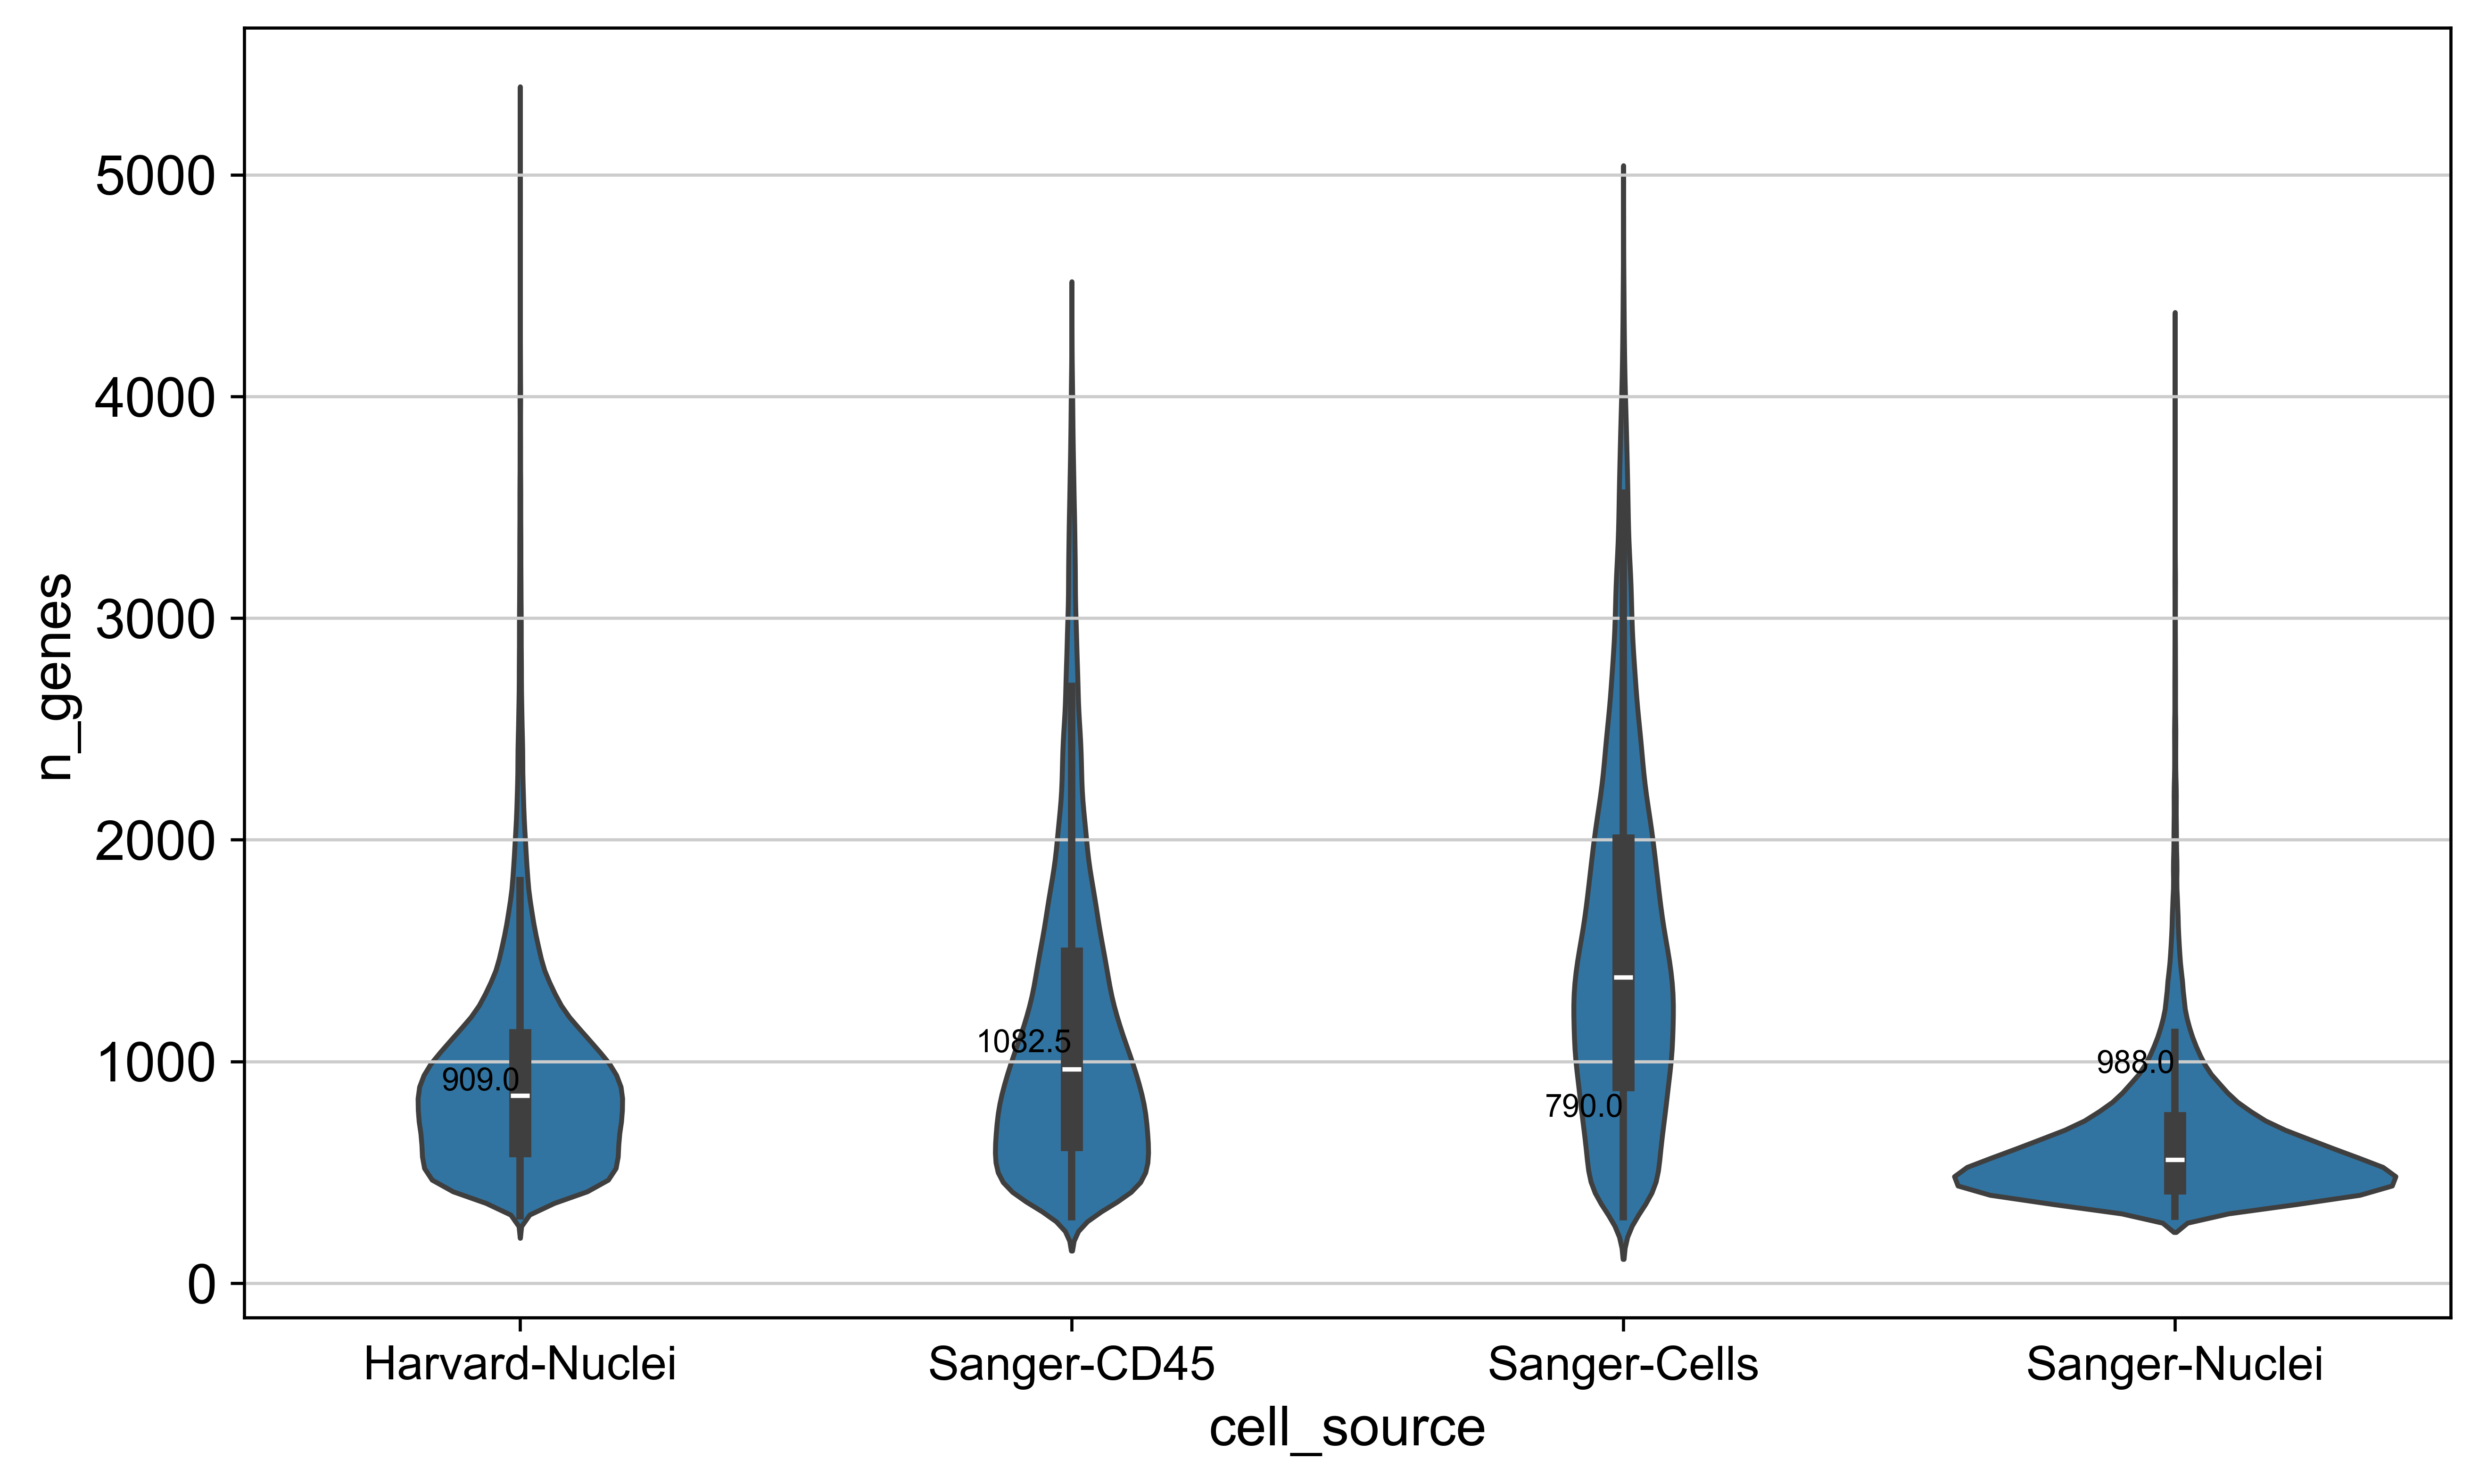

In [5]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cell_source', y='n_genes', data=vascular.obs)

# Calculate median values for each group
medians = vascular.obs.groupby('cell_type')['n_genes'].median().values

# Add median values to the plot
for i, median in enumerate(medians):
    plt.text(i, median, f'{median}',fontsize=8, horizontalalignment='right', verticalalignment='center', color = 'black')

# Set font size for specific text elements
plt.xticks(fontsize=12)
plt.show()

### Number of genes vs Cell type

/var/folders/m6/j4jl72rj0pl7_bbwngtxl9ym0000gn/T/ipykernel_5617/1299308012.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = vascular.obs.groupby('cell_type')['n_genes'].median().values


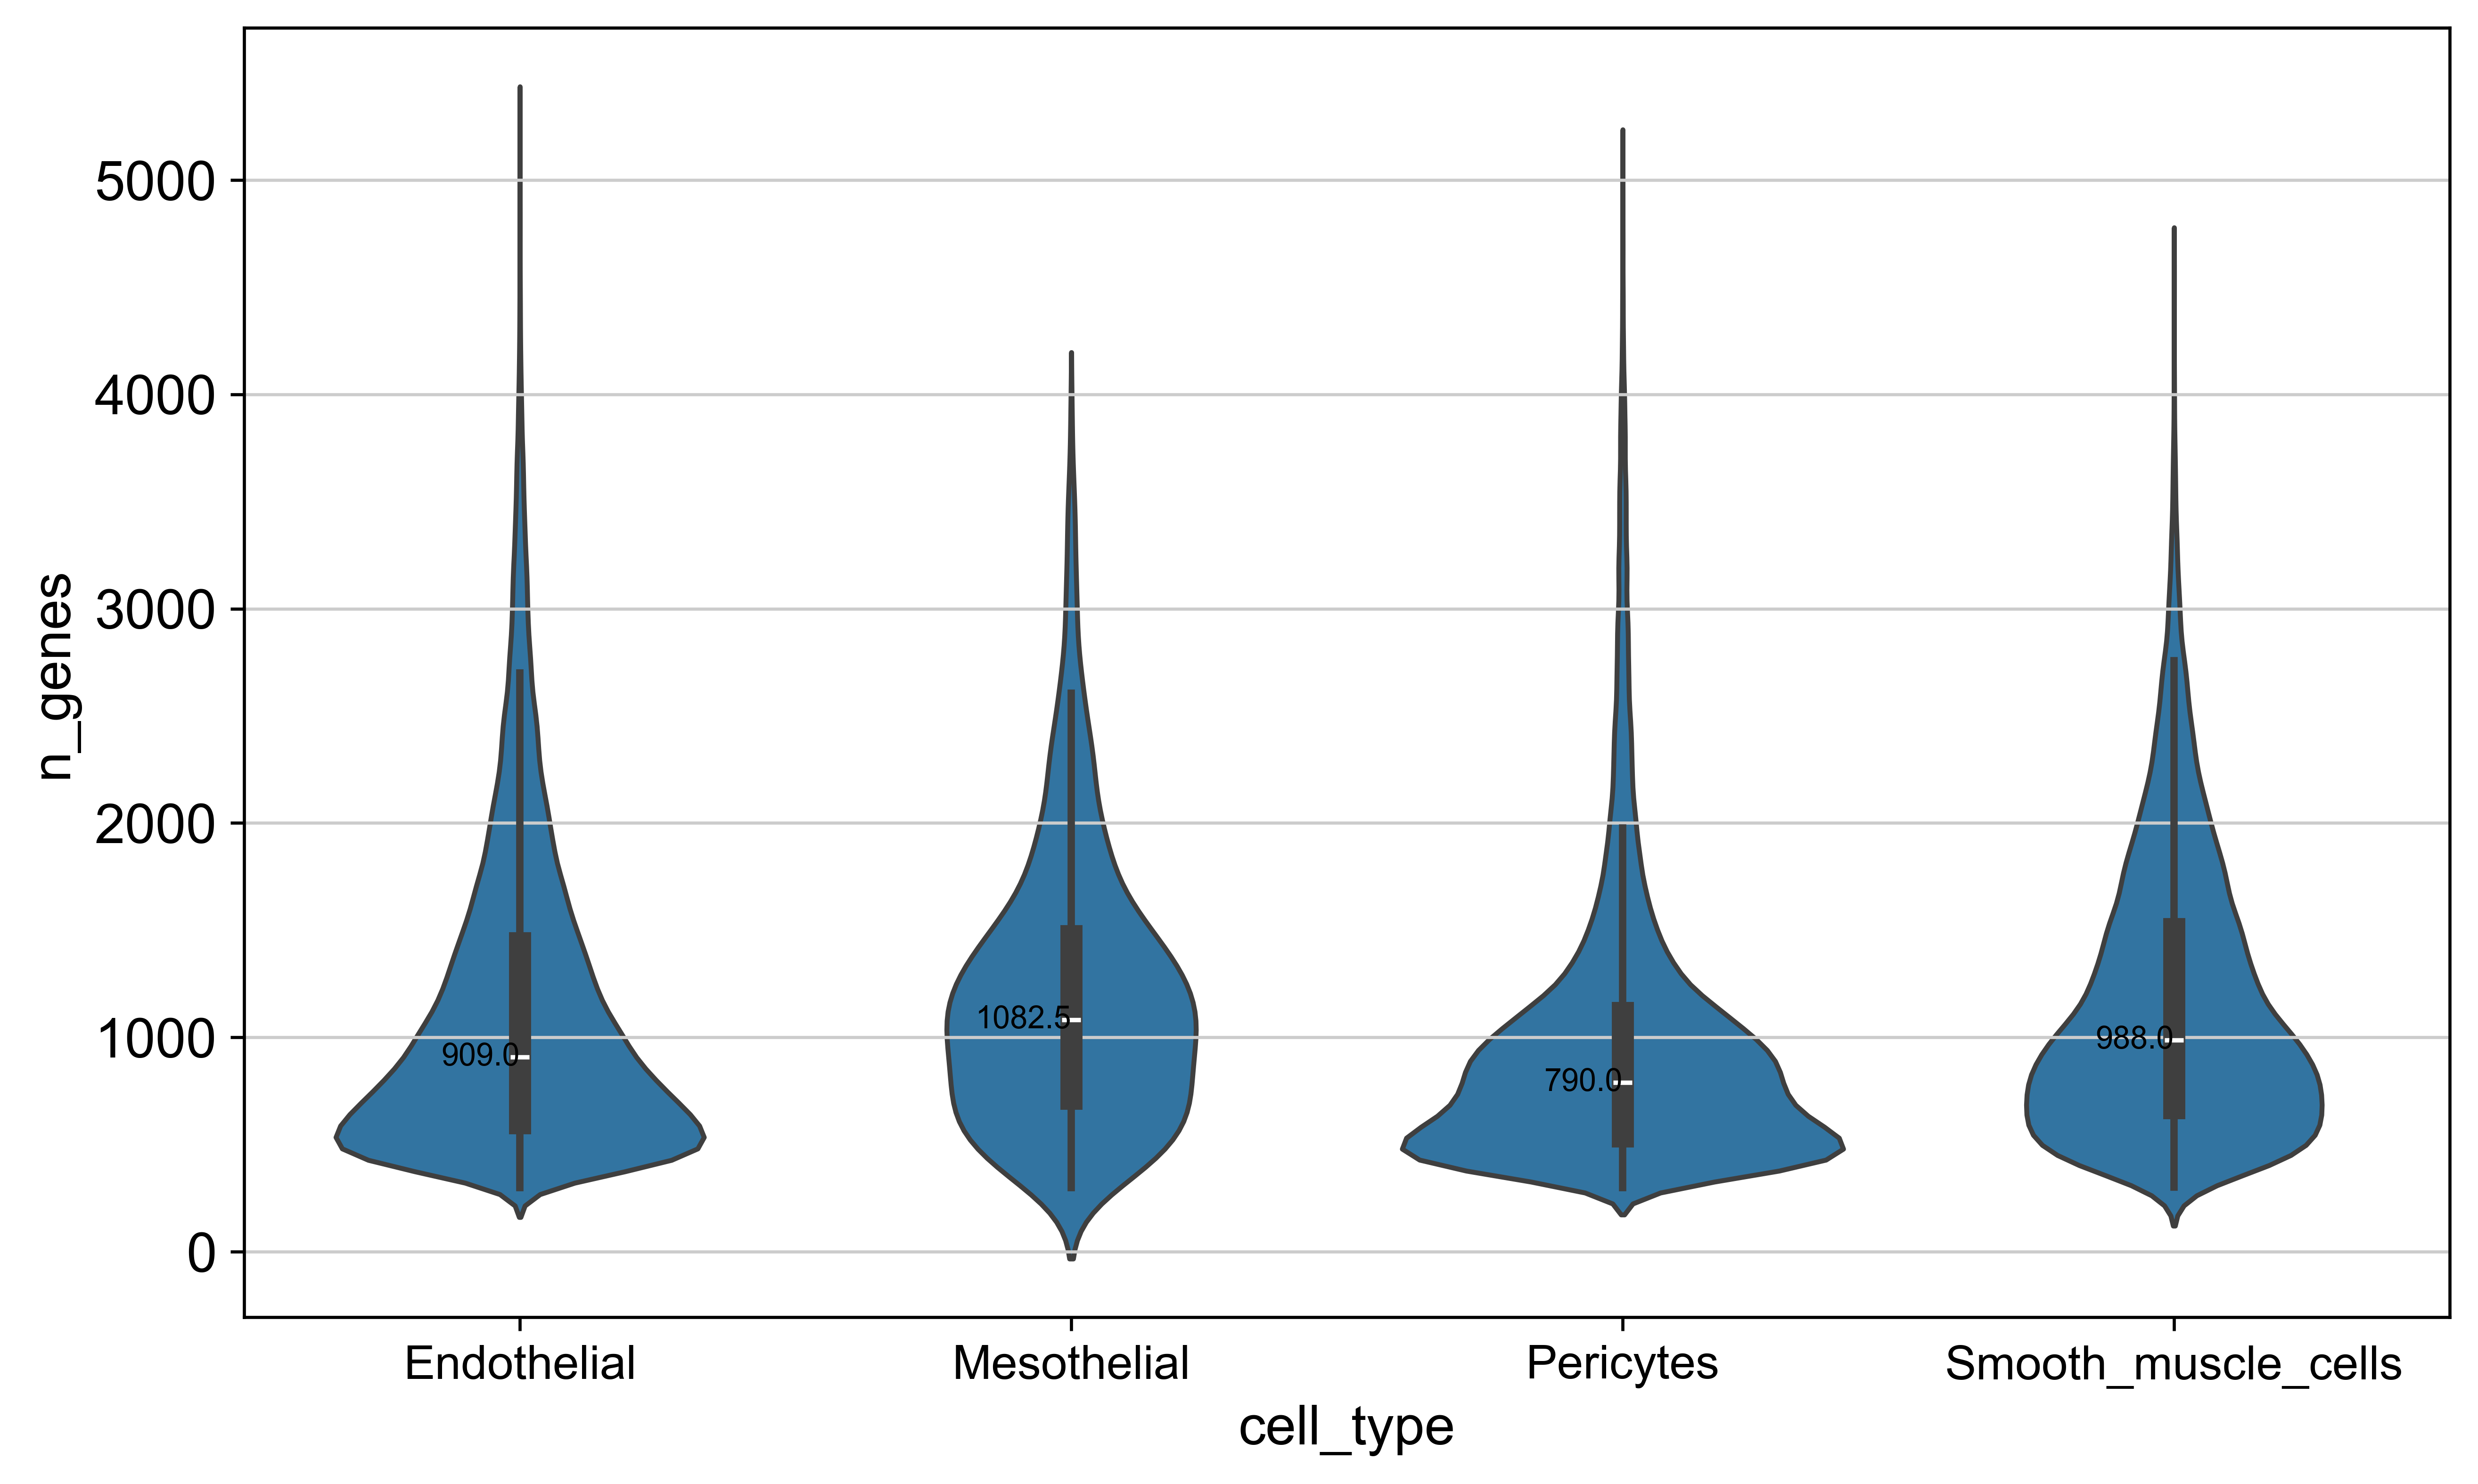

In [6]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cell_type', y='n_genes', data=vascular.obs)

# Calculate median values for each group
medians = vascular.obs.groupby('cell_type')['n_genes'].median().values

# Add median values to the plot
for i, median in enumerate(medians):
    plt.text(i, median, f'{median}',fontsize=8, horizontalalignment='right', verticalalignment='center', color = 'black')

# Set font size for specific text elements
plt.xticks(fontsize=12)
plt.show()

##### *Description of cell types*

**Endothelial** : Regulate contractions for blood flow

**Mesothelial** : Maintainance of homeostasis in response to injury, inflammation 

**Pericytes** : Role in vascular regulation : vascular blood flow. vascular integrity

**Smooth Muscle Cells** : Regulate vascular contraction and ECM generation

### Cell type vs Region

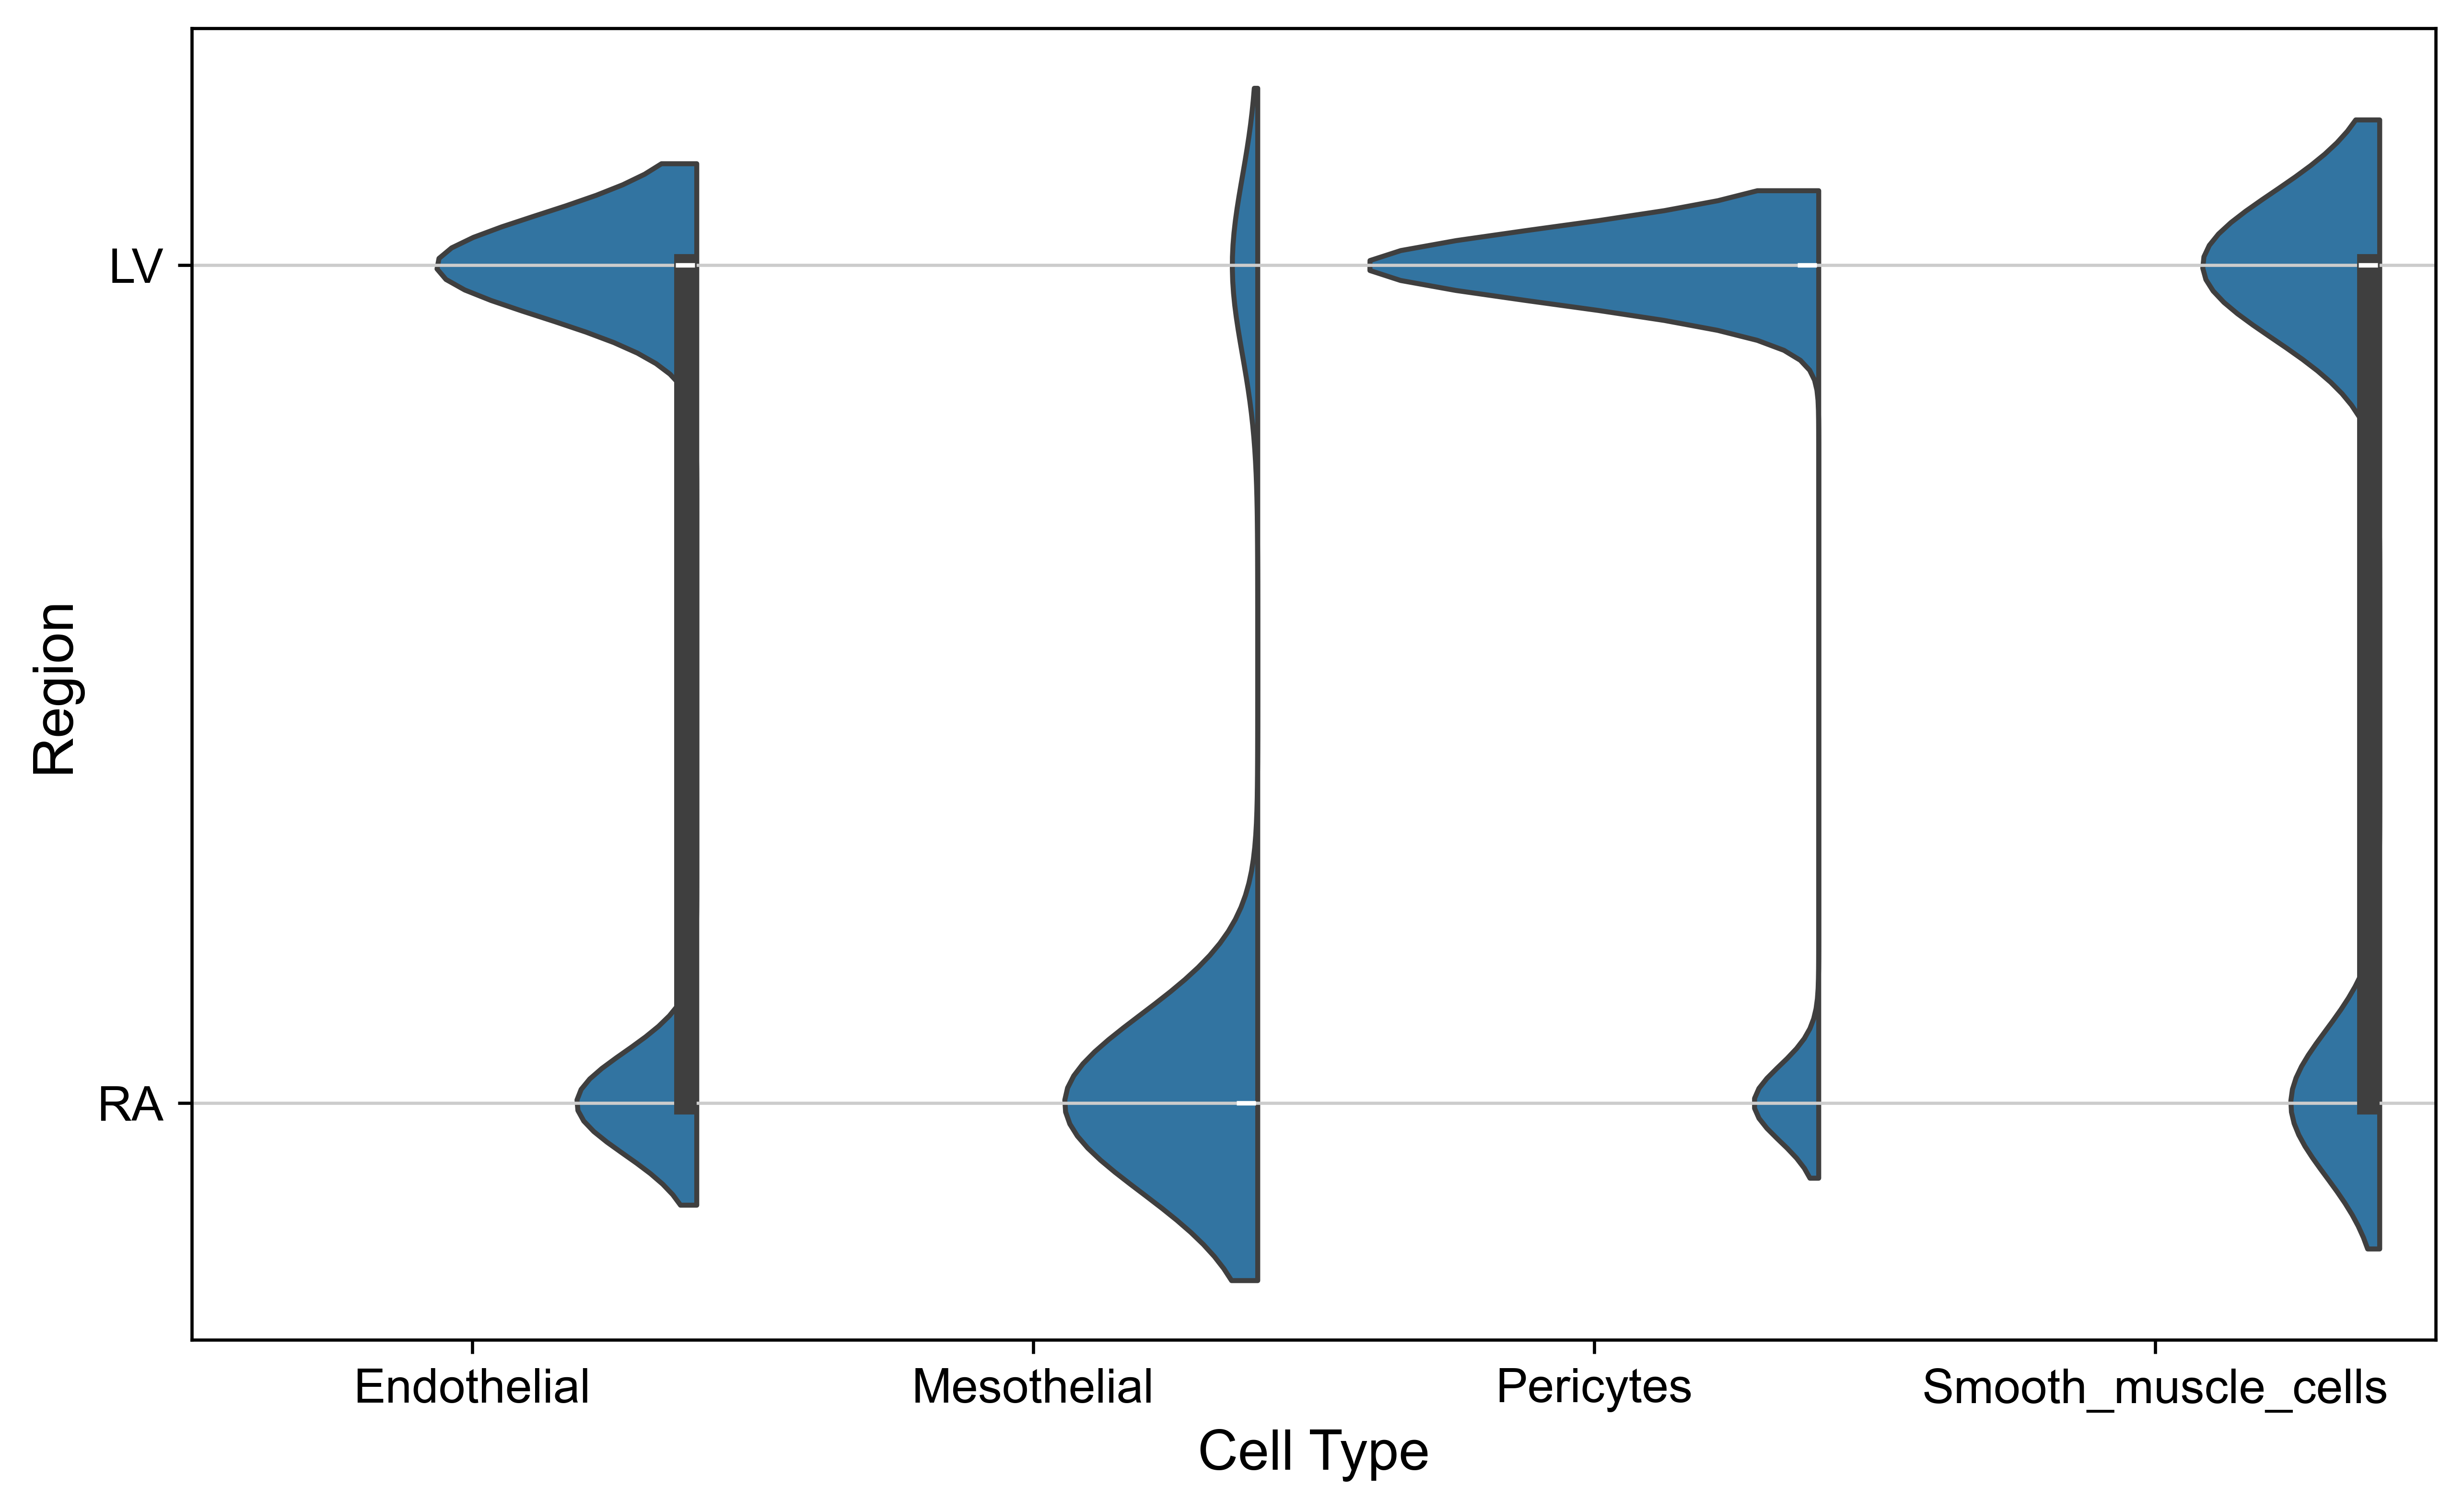

In [34]:
# Filter the data to include only the rows where region is LV or RA
filtered_data = vascular.obs[vascular.obs['region'].isin(['LV', 'RA'])]

# Create the rotated violin plot with filtered data
plt.figure(figsize=(10, 6))
sns.violinplot(x='cell_type', y='region', data=filtered_data, split=True)

# Set font size for specific text elements
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add labels to axes
plt.xlabel('Cell Type', fontsize=14)
plt.ylabel('Region', fontsize=14)

# Show the plot
plt.show()

## Number of counts

/var/folders/m6/j4jl72rj0pl7_bbwngtxl9ym0000gn/T/ipykernel_5617/827208090.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = vascular.obs.groupby('region')['n_counts'].median().values


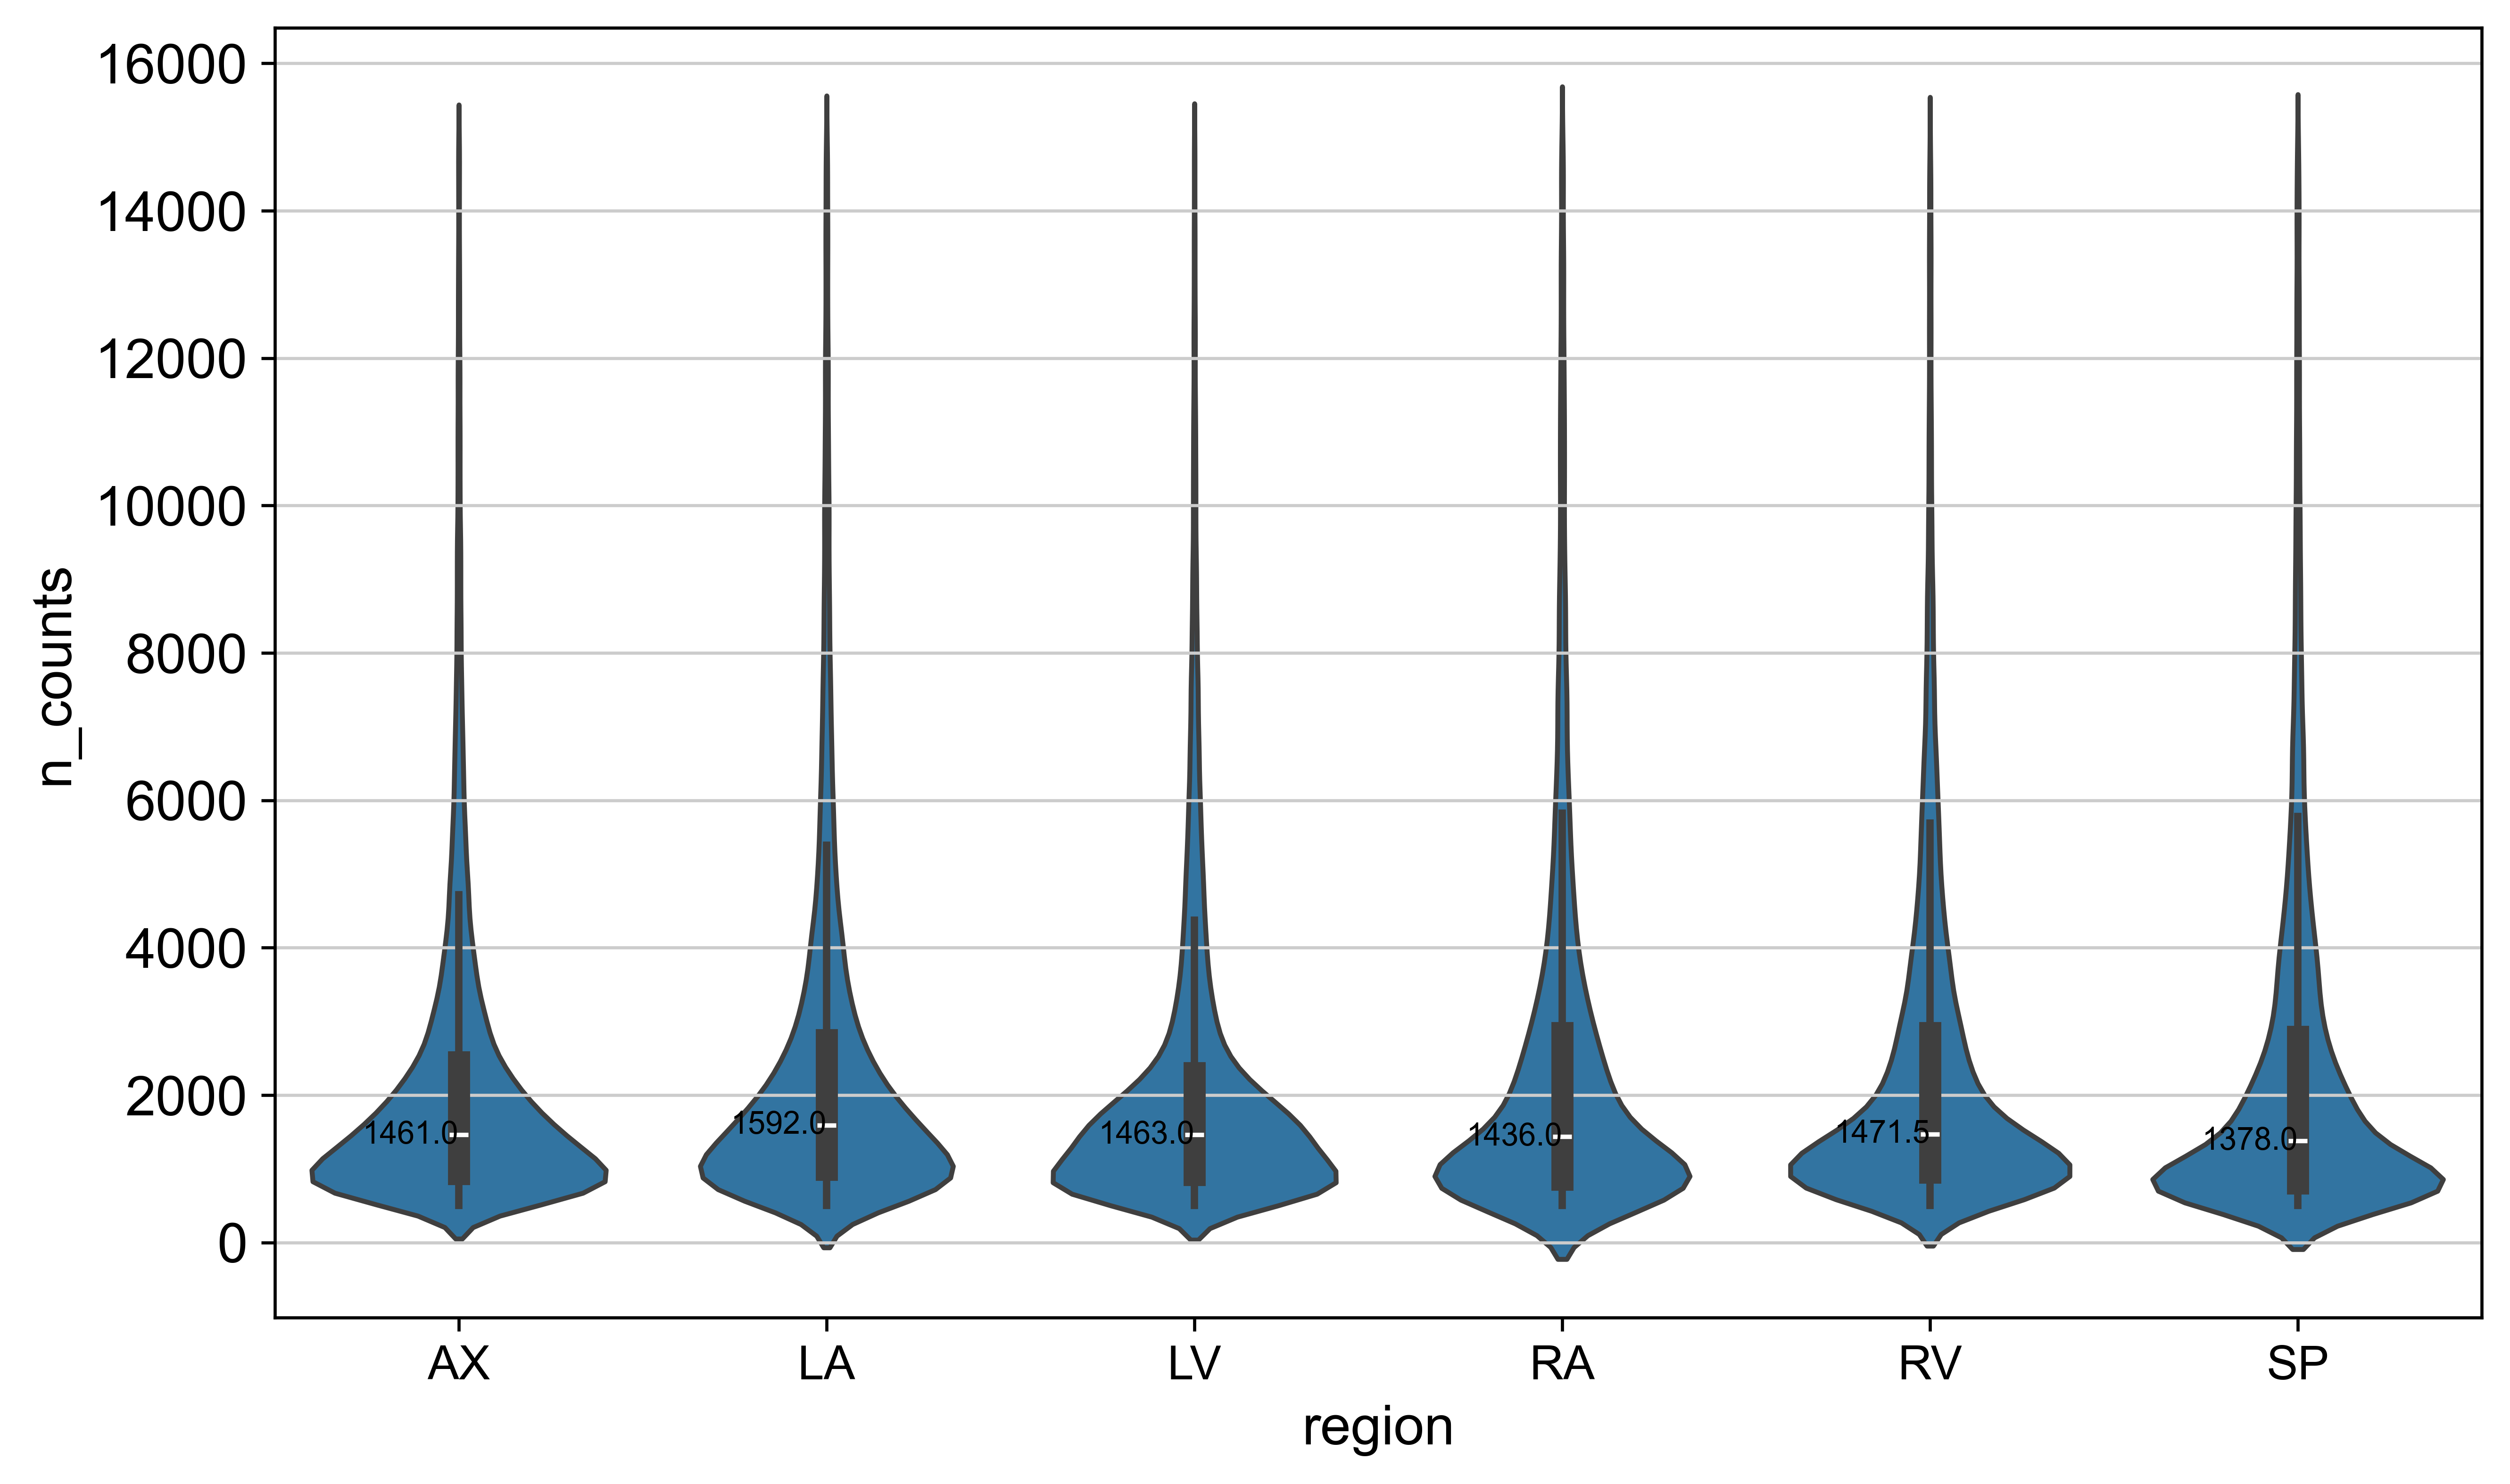

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='region', y='n_counts', data=vascular.obs)

# Calculate median values for each group
medians = vascular.obs.groupby('region')['n_counts'].median().values

# Add median values to the plot
for i, median in enumerate(medians):
    plt.text(i, median, f'{median}',fontsize=8, horizontalalignment='right', verticalalignment='center', color = 'black')

# Set font size for specific text elements
plt.xticks(fontsize=12)
plt.show()

##### *Description of data analysed*

The violin plot illustrates that a similar range of counts is observed across all regions. Although there are variations in median values, the overall range and distribution are consistent across regions.

Notably, the LA region exhibits a higher number of counts compared to others, as evidenced by the wider representation in the plot.

This analysis suggests that while there are variations in the median counts among regions, the overall distribution remains relatively consistent.